In [345]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [346]:
import pandas as pd

In [347]:
# Shift-JISエンコーディングで読み込みを試みる
data_before = pd.read_csv('../data/設計値変更前_LTデータ.csv', encoding='shift_jis')

# 最初の数行を表示してデータの概観を確認
data_before.head()

,Unnamed: 0,かんばんシリアル,伝票番号,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,整備室,箱種,箱サイズ,箱重量,基準在庫日数,基準在庫枚数,手配区分,基準在庫日数（基準在庫枚数込み）,実績在庫日数,在庫状態
0,0,1823C00249622,BANG620,9915000022,ｽﾌﾟﾘﾝｸﾞS/A ﾘﾀｰﾝ,300.0,（株）東郷製作所,< NULL >,回収済,2023/03/23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1823C00250859,BANG620,9915000040,ｽﾌﾟﾘﾝｸﾞ,500.0,（株）東郷製作所,< NULL >,回収済,2023/03/23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1Z23B00048269,XBKC760,019120LC040,ｷｬｯﾌﾟｼｯﾋﾟﾝｸﾞ,300.0,石黒ゴム工業（株）,< NULL >,回収済,2023/03/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1Z23B00048270,XBKC770,019120LC040,ｷｬｯﾌﾟｼｯﾋﾟﾝｸﾞ,300.0,石黒ゴム工業（株）,< NULL >,回収済,2023/03/03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1Z23B00048271,XBKC780,019120LC040,ｷｬｯﾌﾟｼｯﾋﾟﾝｸﾞ,300.0,石黒ゴム工業（株）,< NULL >,回収済,2023/03/06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
# Shift-JISエンコーディングで読み込みを試みる
data_after = pd.read_csv('../data/設計値変更後_LTデータ.csv', encoding='shift_jis')

# 最初の数行を表示してデータの概観を確認
data_after.head()

,Unnamed: 0,かんばんシリアル,伝票番号,拠点所番地,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,...,整備室,箱種,箱サイズ,箱重量,基準在庫日数,基準在庫枚数,手配区分,基準在庫日数（基準在庫枚数込み）,実績在庫日数,在庫状態
0,0,1Z23G00039168,XCBC150,10431,9033904A003,ｷﾔﾂﾌﾟ,2000,サトープレス工業（株）,本社工場,順立装置出庫済,...,1Y,AW131ﾌﾀﾅｼ,0.006,1.2,0.60,3.0,手配,NaN,NaN,NaN
1,1,1Z23G00039168,XCBC150,10431,9033904A003,ｷﾔﾂﾌﾟ,2000,サトープレス工業（株）,本社工場,順立装置出庫済,...,1Y,AW131ﾌﾀﾅｼ,0.006,1.2,0.60,3.0,手配,NaN,NaN,NaN
2,2,1Z23G00039654,XCBC240,10395,34989ECE010,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,回収済,...,1Y,ＴＰ１３１フタナシ,0.006,1.0,0.72,1.0,手配,4.039633,54.88,異常5
3,3,1Z23G00041222,XCBD780,10505,34989ECE030,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,回収済,...,1Y,ＴＰ１３１フタナシ,0.006,1.0,0.80,3.0,手配,13.033010,49.96,異常5
4,4,1Z23G00059286,XCBN070,10505,34989ECE030,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,順立装置出庫済,...,1Y,ＴＰ１３１フタナシ,0.006,1.0,0.80,3.0,手配,NaN,NaN,NaN


In [364]:
#指定日時を取り出す

data_before['回収日時'] = pd.to_datetime(data_before['回収日時'], errors='coerce')
data_after['回収日時']    = pd.to_datetime(data_after['回収日時'], errors='coerce')

#田中さんから頂いた3月データは回収済のみのため
#月から土曜の9時まで
data_before2 = data_before[(data_before['回収日時'] >= '2023-03-13') & 
                              (data_before['回収日時'] <= '2023-03-18-09')]
data_after2 = data_after[(data_after['回収日時'] >= '2023-09-04') & 
                              (data_after['回収日時'] <= '2023-09-09-09') & (data_after['ステータス'] == '回収済') ]

#田中さんから頂いた3月データはシムが含まれている。1Yでないものもある
print("設計値変更前","元データのかんばん数",len(data_before),"抽出したデータのかんばん数",len(data_before2),"品番数",
      len(data_before.loc[:,'品番'].unique()))
print("設計値変更後：","元データのかんばん数",len(data_after),"抽出したデータのかんばん数",len(data_after2),"品番数",
      len(data_after.loc[:,'品番'].unique()))

設計値変更前 元データのかんばん数 12542 抽出したデータのかんばん数 3307 品番数 214
設計値変更後： 元データのかんばん数 17920 抽出したデータのかんばん数 11581 品番数 145


In [365]:
# 各品番の各在庫状態の件数をカウント
# 各品番と在庫状態の組み合わせのカウントを計算
inventory_status_counts_before = data_before2.groupby(['品番', '在庫状態']).size().unstack(fill_value=0)

# すべての在庫状態の組み合わせを含むデータフレームを作成
all_inventory_statuses = ['品番','正常1', '正常2', '正常3', '正常4', '異常1', '異常2', '異常3', '異常4', '異常5']
all_combinations_df = pd.DataFrame(columns=all_inventory_statuses)

# 品番ごとに在庫状態の割合を計算
inventory_status_ratios_before = pd.DataFrame()

for hinban, counts in inventory_status_counts_before.iterrows():
    ratios = counts / counts.sum() * 100
    row_data = {'品番': hinban}
    row_data.update(ratios)
    inventory_status_ratios_before = inventory_status_ratios_before.append(row_data, ignore_index=True)
#inventory_status_ratios_before.reset_index(inplace=True)

inventory_status_ratios_before .head()

,品番,正常1,正常2,正常3,正常4,異常1,異常2,異常3,異常4,異常5
0,019128GA010,0.0,0.0,36.842105,10.526316,0.000000,0.0,5.263158,15.789474,31.578947
1,01912ECB010,0.0,0.0,0.000000,0.000000,11.111111,0.0,0.000000,33.333333,55.555556
2,1040043104R,0.0,0.0,0.000000,0.000000,0.000000,0.0,100.000000,0.000000,0.000000
3,1040052001Z,0.0,0.0,0.000000,25.000000,0.000000,0.0,0.000000,25.000000,50.000000
4,1040183011P,0.0,0.0,0.000000,0.000000,33.333333,0.0,33.333333,33.333333,0.000000


In [366]:
# 各品番の各在庫状態の件数をカウント
# 各品番と在庫状態の組み合わせのカウントを計算
inventory_status_counts_after = data_after2.groupby(['品番', '在庫状態']).size().unstack(fill_value=0)

# すべての在庫状態の組み合わせを含むデータフレームを作成
all_inventory_statuses = ['品番','正常1', '正常2', '正常3', '正常4', '異常1', '異常2', '異常3', '異常4', '異常5']
all_combinations_df = pd.DataFrame(columns=all_inventory_statuses)

# 品番ごとに在庫状態の割合を計算
inventory_status_ratios_after = pd.DataFrame()

for hinban, counts in inventory_status_counts_after.iterrows():
    ratios = counts / counts.sum() * 100
    row_data = {'品番': hinban}
    row_data.update(ratios)
    inventory_status_ratios_after = inventory_status_ratios_after.append(row_data, ignore_index=True)
    
#inventory_status_ratios_before.reset_index(inplace=True)

inventory_status_ratios_after .head(5)

,品番,正常1,正常2,正常3,正常4,異常1,異常2,異常3,異常4,異常5
0,019128GA010,0.0,0.0,0.0,1.075269,7.526882,9.677419,16.129032,15.053763,50.537634
1,01912ECB010,0.0,0.0,0.0,0.000000,0.000000,6.451613,9.677419,16.129032,67.741935
2,01912ECB040,0.0,0.0,0.0,0.000000,1.075269,2.150538,9.677419,10.752688,76.344086
3,01912ECB060,0.0,0.0,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,80.000000
4,1040043104R,0.0,0.0,0.0,12.500000,0.000000,25.000000,0.000000,37.500000,25.000000


In [367]:
long_before = len(inventory_status_ratios_before.iloc[:,0])
long_after    = len(inventory_status_ratios_after.iloc[:,0])

print(long_before,long_after)

result = pd.DataFrame()
result_kari = pd.DataFrame()

k=0
m=0

for i in range(long_before):
    if i%10==0:
        print(i)
    count = 0
    for j in range(long_after):
        hinban_before = inventory_status_ratios_before.loc[i,"品番"]
        hinban_before2 = hinban_before.replace("-", "") 
        hinban_before3 = hinban_before2.replace(" ", "") 
        hinban_after =  inventory_status_ratios_after.loc[j,"品番"]  
        hinban_after2 = hinban_after.replace("-", "") 
        hinban_after3 = hinban_after2.replace(" ", "") 
        if hinban_before3 == hinban_after3:
            result.loc[i,"品番"]  = hinban_before3
            
            result.loc[i,"変更前）正常1"]= inventory_status_ratios_before.loc[i,"正常1"] 
            result.loc[i,"変更前）正常2"]= inventory_status_ratios_before.loc[i,"正常2"] 
            result.loc[i,"変更前）正常3"]= inventory_status_ratios_before.loc[i,"正常3"] 
            result.loc[i,"変更前）正常4"]= inventory_status_ratios_before.loc[i,"正常4"] 
            result.loc[i,"変更前）異常1"]= inventory_status_ratios_before.loc[i,"異常1"] 
            result.loc[i,"変更前）異常2"]= inventory_status_ratios_before.loc[i,"異常2"] 
            result.loc[i,"変更前）異常3"]= inventory_status_ratios_before.loc[i,"異常3"] 
            result.loc[i,"変更前）異常4"]= inventory_status_ratios_before.loc[i,"異常4"] 
            result.loc[i,"変更前）異常5"]= inventory_status_ratios_before.loc[i,"異常5"] 
            
            result.loc[i,"変更後）正常1"]= inventory_status_ratios_after.loc[j,"正常1"] 
            result.loc[i,"変更後）正常2"]= inventory_status_ratios_after.loc[j,"正常2"] 
            result.loc[i,"変更後）正常3"]= inventory_status_ratios_after.loc[j,"正常3"] 
            result.loc[i,"変更後）正常4"]= inventory_status_ratios_after.loc[j,"正常4"] 
            result.loc[i,"変更後）異常1"]= inventory_status_ratios_after.loc[j,"異常1"] 
            result.loc[i,"変更後）異常2"]= inventory_status_ratios_after.loc[j,"異常2"] 
            result.loc[i,"変更後）異常3"]= inventory_status_ratios_after.loc[j,"異常3"] 
            result.loc[i,"変更後）異常4"]= inventory_status_ratios_after.loc[j,"異常4"] 
            result.loc[i,"変更後）異常5"]= inventory_status_ratios_after.loc[j,"異常5"] 
            
            result.loc[i,"差分）正常1"]= inventory_status_ratios_after.loc[j,"正常1"] - inventory_status_ratios_before.loc[i,"正常1"] 
            result.loc[i,"差分）正常2"]= inventory_status_ratios_after.loc[j,"正常2"] - inventory_status_ratios_before.loc[i,"正常2"] 
            result.loc[i,"差分）正常3"]= inventory_status_ratios_after.loc[j,"正常3"] - inventory_status_ratios_before.loc[i,"正常3"] 
            result.loc[i,"差分）正常4"]= inventory_status_ratios_after.loc[j,"正常4"] - inventory_status_ratios_before.loc[i,"正常4"] 
            result.loc[i,"差分）異常1"]= inventory_status_ratios_after.loc[j,"異常1"] - inventory_status_ratios_before.loc[i,"異常1"] 
            result.loc[i,"差分）異常2"]= inventory_status_ratios_after.loc[j,"異常2"] - inventory_status_ratios_before.loc[i,"異常2"] 
            result.loc[i,"差分）異常3"]= inventory_status_ratios_after.loc[j,"異常3"] - inventory_status_ratios_before.loc[i,"異常3"] 
            result.loc[i,"差分）異常4"]= inventory_status_ratios_after.loc[j,"異常4"] - inventory_status_ratios_before.loc[i,"異常4"] 
            result.loc[i,"差分）異常5"]= inventory_status_ratios_after.loc[j,"異常5"] - inventory_status_ratios_before.loc[i,"異常5"] 
            
            m = m + 1
            
        else:
            count=count+1
    if count == long_after:
        result_kari.loc[k,"品番"] = hinban_before3
        k=k+1
        
result_kari["品番"].head(100)

127 143
0
10
20
30
40
50
60
70
80
90
100
110
120


0     9056439A004
1     9056439A005
2     9056450A002
3     9056450A003
4     9056455A045
5     9056457A133
6     9056457A134
7     9056457A136
8     9056457A137
9     9056463A031
10    9056463A032
11    9056463A033
12    9056463A034
13    9056463A035
Name: 品番, dtype: object

In [368]:
print(len(result_kari["品番"]),m)

14 113


In [369]:
count = 0
tehaidata = pd.read_excel('..//data//設計値変更前_XR10_手配運用情報_データ抽出.xlsx',encoding='cp932')
long = tehaidata.iloc[:,0]
long2= result.iloc[:,0]

#print(long,long2)

result = result.reset_index(drop=True)

for i  in range(len(long2)):
        resulthinban = result.loc[i,'品番'].replace('-', '')
        #print(i,resulthinban)
        resulthinban2 = resulthinban.replace(' ', '')
        for j in range(len(long)):
            hinban = str(tehaidata.loc[j,'品番'] )
            hinban2 = hinban.replace("-", "") 
            hinban3 = hinban2.replace(" ", "") 
            if hinban3 == resulthinban2:
                result.loc[i, '品名'] = tehaidata.loc[j,'品名']
                result.loc[i, '収容数'] = tehaidata.loc[j,'かんばん情報収容数']
                result.loc[i, '仕入先名/工場名'] = tehaidata.loc[j,'仕入先名/工場名']
                result.loc[i, 'A'] = tehaidata.loc[j,'納入ｻｲｸﾙ間隔']
                result.loc[i, 'B'] = tehaidata.loc[j,'納入ｻｲｸﾙ回数']
                result.loc[i, 'C'] = tehaidata.loc[j,'納入ｻｲｸﾙ情報']
                result.loc[i, '整備室'] = tehaidata.loc[j,'整備室']
                result.loc[i, '箱種'] = tehaidata.loc[j,'登録箱種']
                result.loc[i, '箱サイズ'] = tehaidata.loc[j,'容積(m3)']
                result.loc[i, '箱重量'] = tehaidata.loc[j,'総重量(Kg)']
                result.loc[i, '手配区分'] = tehaidata.loc[j,'手配区分']

In [370]:
# 各品番のリードタイムの中央値を計算
median_lead_times_before = data_before2.groupby('品番')['社内LT'].median()
median_lead_times_after = data_after2.groupby('品番')['社内LT'].median()

count_kanban_before = data_before2.groupby('品番')['かんばんシリアル'].count()
count_kanban_after    = data_after2.groupby('品番')['かんばんシリアル'].count()

result_median = pd.DataFrame()

median_lead_times_before.head()

for i in median_lead_times_before.index:
    for j in median_lead_times_after.index:
        hinban_before =  str(i)
        hinban_before2 = hinban_before.replace("-", "") 
        hinban_before3 = hinban_before2.replace(" ", "") 
        hinban_after    =  str(j)
        hinban_after2 = hinban_after.replace("-", "") 
        hinban_after3 = hinban_after2.replace(" ", "") 
        if hinban_before3 == hinban_after3:
            result_median.loc[i, '変更前）かんばんの数'] = count_kanban_before.loc[i]
            result_median.loc[i, '変更後）かんばんの数'] = count_kanban_after.loc[j]
            result_median.loc[i, '変更前）社内LT'] = median_lead_times_before.loc[i]
            result_median.loc[i, '変更後）社内LT'] = median_lead_times_after.loc[j]
result_median.head(5)

,変更前）かんばんの数,変更後）かんばんの数,変更前）社内LT,変更後）社内LT
019128GA010,19.0,93.0,2.86,3.51
01912ECB010,9.0,31.0,5.86,3.52
1040043104R,1.0,9.0,5.13,6.11
1040052001Z,4.0,15.0,6.31,3.45
1040183011P,3.0,12.0,3.30,1.19


In [371]:
count_kanban_before.head()

品番
019120LC030     4
019120LC040     2
019120LC070     1
019128GA010    19
01912ECB010     9
Name: かんばんシリアル, dtype: int64

In [372]:
for i  in range(len(long2)):
        resulthinban = result.loc[i,'品番'].replace('-', '')
        resulthinban2 = resulthinban.replace(' ', '')
        for j in result_median.index:
            hinban = str(j )
            hinban2 = hinban.replace("-", "") 
            hinban3 = hinban2.replace(" ", "") 
            if hinban3 == resulthinban2:
                result.loc[i, '変更前）かんばん数'] = result_median.loc[j, '変更前）かんばんの数']
                result.loc[i, '変更後）かんばん数'] = result_median.loc[j, '変更後）かんばんの数']
                result.loc[i, '変更前）社内LT'] = result_median.loc[j, '変更前）社内LT'] 
                result.loc[i, '変更後）社内LT'] = result_median.loc[j, '変更後）社内LT'] 
                result.loc[i, '差分）社内LT'] = result_median.loc[j, '変更後）社内LT'] -  result_median.loc[j, '変更前）社内LT'] 

In [373]:
data_LT_before = pd.read_excel('..//data//設計値変更前_20230410_22年3月実績分析(回収済)_データ抽出.xlsx',encoding='shift_jis')

kizyun_before = data_before.groupby('品番')['基準在庫日数（基準在庫枚数込み）'].mean()

for i  in range(len(long2)):
    resulthinban = result.loc[i,'品番'].replace('-', '')
    resulthinban2 = resulthinban.replace(' ', '')
    for j in kizyun_before.index:
        hinban    =  str(j)
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban.replace(" ", "") 
        if hinban3 == resulthinban2:
            result.loc[i, '変更前）基準在庫日数（基準在庫枚数込み）'] = kizyun_before.loc[j]
            result.loc[i, '変更前）社内LT-基準在庫日数（基準在庫枚数込み）'] = result.loc[i, '変更前）社内LT'] - kizyun_before.loc[j]

In [374]:
data_LT_after = pd.read_csv('..//data//設計値変更後_pre_zaikodata_20230913までの設計値変更データ.csv',encoding='shift_jis')

kizyun_after = data_after.groupby('品番')['基準在庫日数（基準在庫枚数込み）'].mean()

for i  in range(len(long2)):
    resulthinban = result.loc[i,'品番'].replace('-', '')
    resulthinban2 = resulthinban.replace(' ', '')
    for j in kizyun_after.index:
        hinban    =  str(j)
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban.replace(" ", "") 
        if hinban3 == resulthinban2:
            result.loc[i, '変更後）基準在庫日数（基準在庫枚数込み）'] = kizyun_after.loc[j]
            result.loc[i, '変更後）社内LT-基準在庫日数（基準在庫枚数込み）'] = result.loc[i, '変更後）社内LT'] - kizyun_after.loc[j]

In [375]:
tehaisudata = pd.read_csv('..//data//設計値変更前_202303_手配数_1Y_8次_data.csv',encoding='cp932')
long_tehaisudata = len(tehaisudata)

for i  in range(len(long2)):
    resulthinban = result.loc[i,'品番'].replace('-', '')
    resulthinban2 = resulthinban.replace(' ', '')
    for j in range(long_tehaisudata):
        hinban    =  tehaisudata.loc[j,'品番'].replace('-', '')
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban.replace(" ", "") 
        if hinban3 == resulthinban2:
            monday = int(tehaisudata.loc[j,'13(月)'].replace(',', ''))
            thuesday= int(tehaisudata.loc[j,'14(火)'].replace(',', ''))
            wednesday = int(tehaisudata.loc[j,'15(水)'].replace(',', ''))
            thursday = int(tehaisudata.loc[j,'16(木)'].replace(',', ''))
            friday = int(tehaisudata.loc[j,'17(金)'].replace(',', ''))
            week = int(monday + thursday + wednesday + thursday + friday)
            syuyosu = int(tehaisudata.loc[j, "収容数"].replace(',', ''))
            result.loc[i, '変更前）計算社内かんばん数'] = (week/syuyosu) * float(tehaisudata.loc[j, "基準在庫日数"]) + int(tehaisudata.loc[j, "基準在庫枚数"])
            A = float(tehaisudata.loc[j, "サイクル間隔"])
            B = float(tehaisudata.loc[j, "サイクル回数"])
            C = float(tehaisudata.loc[j, "サイクル情報"])
            result.loc[i, '変更前）計算社内かんばん数MAX'] = result.loc[i, '変更前）計算社内かんばん数'] + week/(syuyosu*B*5)
   # print(i,week,syuyosu,week/(syuyosu*B) )

In [376]:
tehaisudata = pd.read_csv('..//data//設計値変更後_202309_手配数_1Y_2次.csv',encoding='cp932')
long_tehaisudata = len(tehaisudata)

for i  in range(len(long2)):
    resulthinban = result.loc[i,'品番'].replace('-', '')
    resulthinban2 = resulthinban.replace(' ', '')
    for j in range(long_tehaisudata):
        hinban    =  tehaisudata.loc[j,'品番'].replace('-', '')
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban.replace(" ", "") 
        if hinban3 == resulthinban2:
            monday = int(tehaisudata.loc[j,'4(月)'].replace(',', ''))
            thuesday= int(tehaisudata.loc[j,'5(火)'].replace(',', ''))
            wednesday = int(tehaisudata.loc[j,'6(水)'].replace(',', ''))
            thursday = int(tehaisudata.loc[j,'7(木)'].replace(',', ''))
            friday = int(tehaisudata.loc[j,'8(金)'].replace(',', ''))
            week = int(monday + thursday + wednesday + thursday + friday)
            syuyosu = int(tehaisudata.loc[j, "収容数"].replace(',', ''))
            result.loc[i, '変更後）計算社内かんばん数'] = (week/syuyosu) * float(tehaisudata.loc[j, "基準在庫日数"]) + int(tehaisudata.loc[j, "基準在庫枚数"])
            A = float(tehaisudata.loc[j, "サイクル間隔"])
            B = float(tehaisudata.loc[j, "サイクル回数"])
            C = float(tehaisudata.loc[j, "サイクル情報"])
            result.loc[i, '変更後）計算社内かんばん数MAX'] = result.loc[i, '変更後）計算社内かんばん数'] + week/(syuyosu*B*5)
    #print(i,week,syuyosu,week/(syuyosu*B) )

In [377]:
#result.head()
#data_before.head()

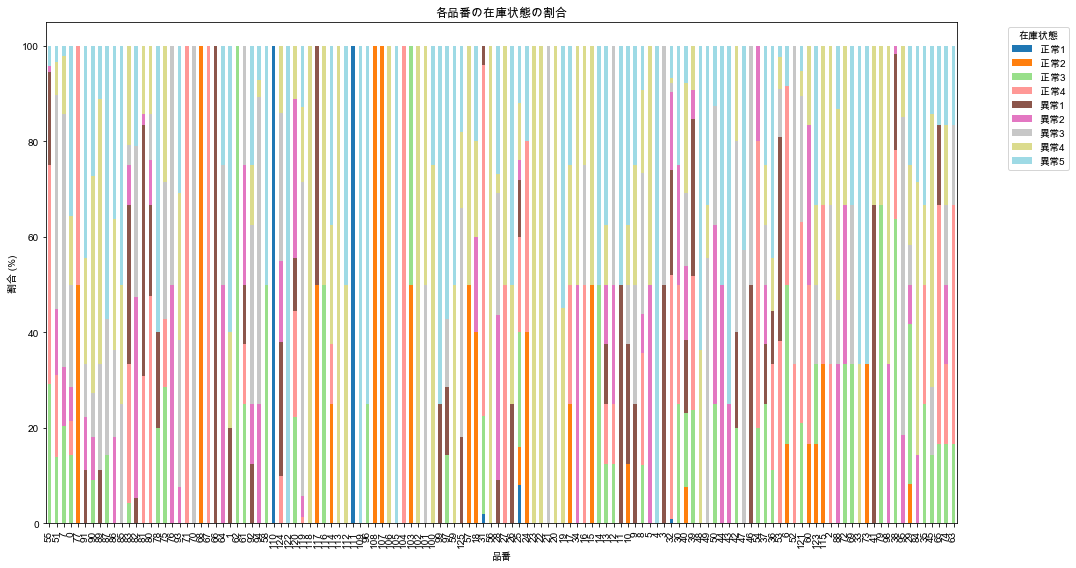

In [295]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  # 欠落している文字をサポートするフォントに置き換えてください

# トップの品番数を定義
top_n = len(inventory_status_ratios_before.iloc[:,0])

# トップの品番のみを選択して棒グラフを表示するデータを選択
top_items = inventory_status_ratios_before.sum(axis=1).nlargest(top_n).index
plot_data = inventory_status_ratios_before.loc[top_items]

# 棒グラフの描画
plot_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('各品番の在庫状態の割合')
plt.ylabel('割合 (%)')
plt.xlabel('品番')
plt.legend(title='在庫状態', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

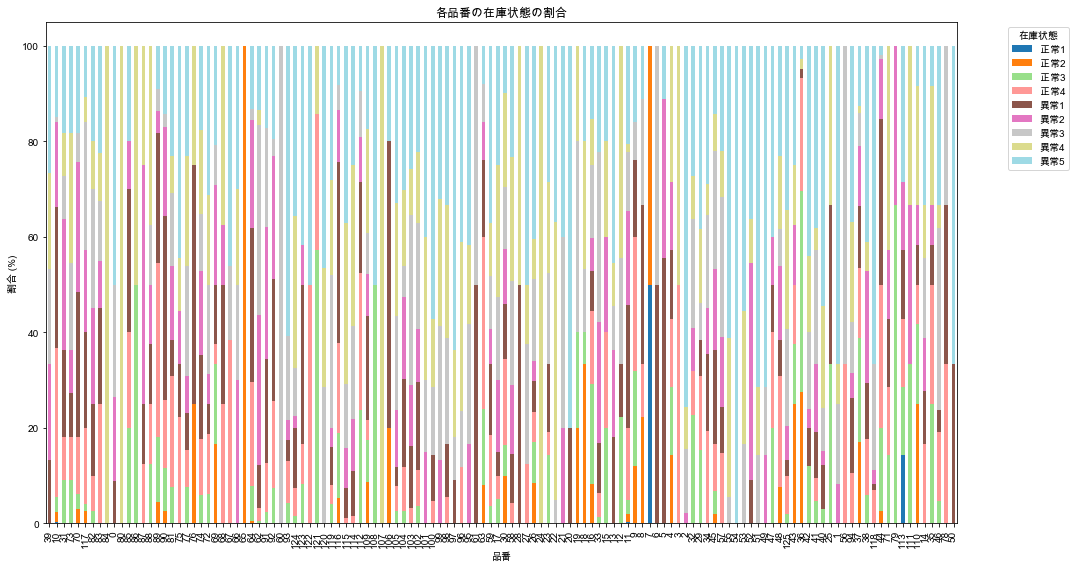

In [296]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  # 欠落している文字をサポートするフォントに置き換えてください

# トップの品番数を定義
top_n = len(inventory_status_ratios_after.iloc[:,0])

# トップの品番のみを選択して棒グラフを表示するデータを選択
top_items = inventory_status_ratios_after.sum(axis=1).nlargest(top_n).index
plot_data = inventory_status_ratios_after.loc[top_items]

# 棒グラフの描画
plot_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('各品番の在庫状態の割合')
plt.ylabel('割合 (%)')
plt.xlabel('品番')
plt.legend(title='在庫状態', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [89]:
#inventory_status_ratios_before.iloc[:,1].unique()
inventory_status_ratios_before.head()

在庫状態,品番,正常1,正常2,正常3,正常4,異常1,異常2,異常3,異常4,異常5
0,019128GA010,0.0,3.370787,21.348315,6.741573,1.123596,2.247191,10.112360,11.235955,43.820225
1,01912ECB010,0.0,0.000000,0.000000,0.000000,6.250000,0.000000,6.250000,34.375000,53.125000
2,1040043104R,0.0,0.000000,14.285714,0.000000,0.000000,0.000000,42.857143,42.857143,0.000000
3,1040052001Z,0.0,0.000000,0.000000,20.000000,6.666667,6.666667,13.333333,26.666667,26.666667
4,1040183011P,0.0,0.000000,0.000000,30.769231,23.076923,0.000000,23.076923,23.076923,0.000000


In [69]:
#inventory_status_ratios_before.head()

In [378]:
with open('..//data//設計値変更前と後の比較.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    result.to_csv(f)